# Visualization of tensors

In [1]:
import numpy as np
from sympy import Matrix
from continuum_mechanics.visualization import (mohr2d, mohr3d, traction_circle,
                                               christofel_eig, plot_surf)

In [2]:
%matplotlib notebook

## Visualization in 2D

First, let us visualize the tensor

$$\begin{bmatrix}
1 &0\\
0 &-1
\end{bmatrix}\, .$$

<IPython.core.display.Javascript object>


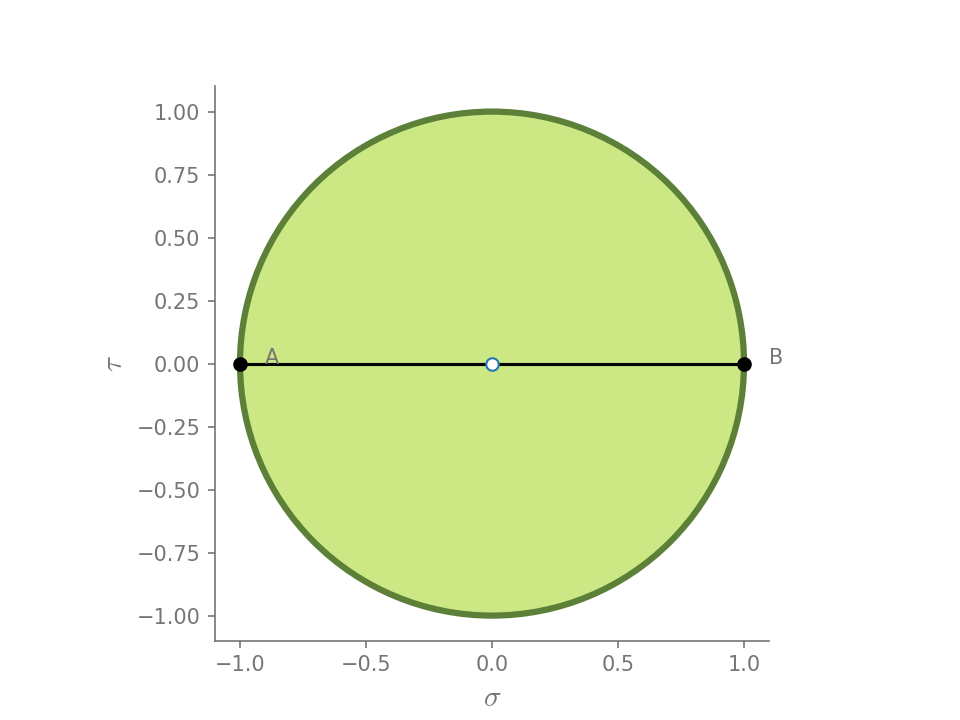

In [3]:
mohr2d(Matrix([
    [1,0],
    [0,-1]]))

From the Mohr circle, we can see that the principal directions are given
at :math:`0` and :math:`\pi/2` radians. This can be more easily
visualized using the traction circle, where normal vectors are presented
in light gray and the traction vectors are presented in colors.

<IPython.core.display.Javascript object>


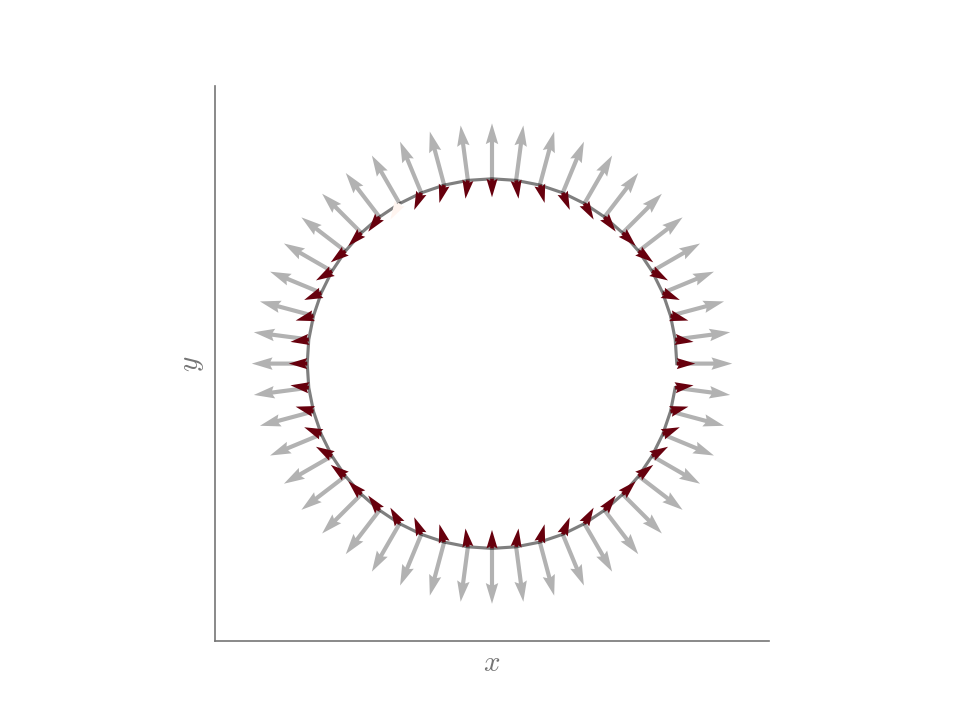

In [4]:
traction_circle(Matrix([
    [1,0],
    [0,-1]]))

Now, let us visualize

$$\begin{bmatrix}
1 &3\\
3 &-5
\end{bmatrix}\, .$$

<IPython.core.display.Javascript object>


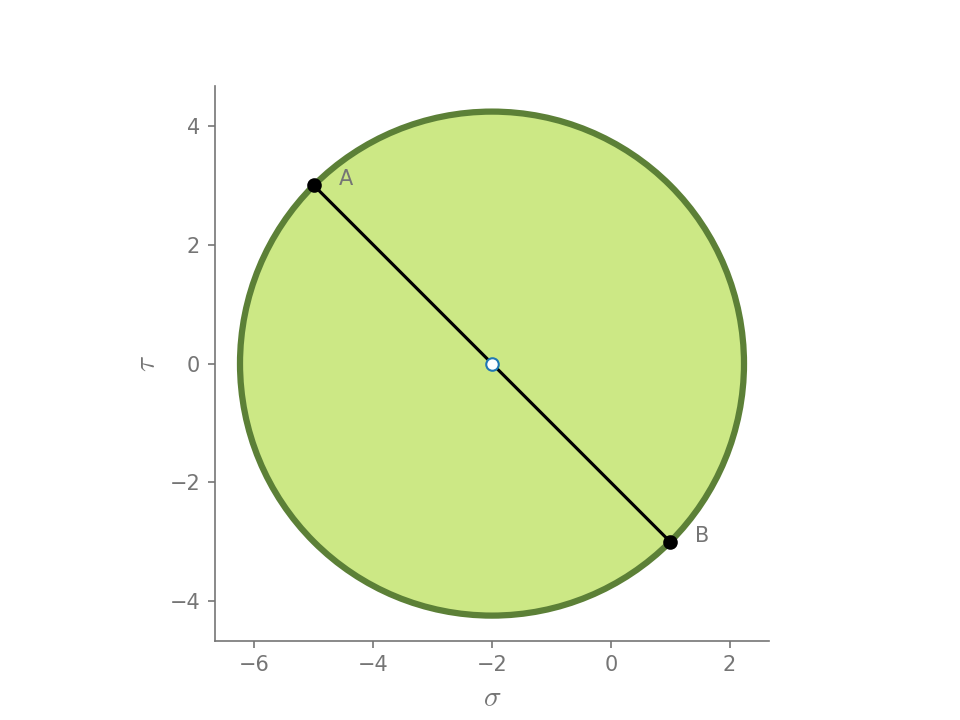

In [5]:
mohr2d(Matrix([
    [1, 3],
    [3, -5]]))

<IPython.core.display.Javascript object>


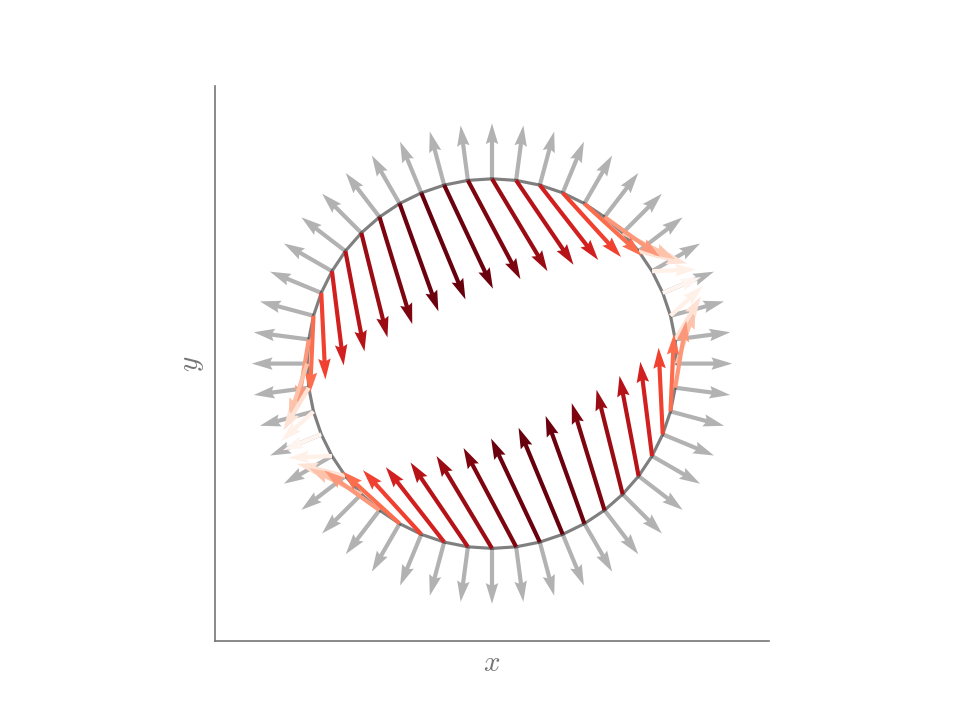

In [6]:
traction_circle(Matrix([
    [1, 3],
    [3, -5]]))

Now, let us try it with an asymmetric tensor

$$\begin{bmatrix}
1 &2\\
0 &3
\end{bmatrix}\, .$$

<IPython.core.display.Javascript object>


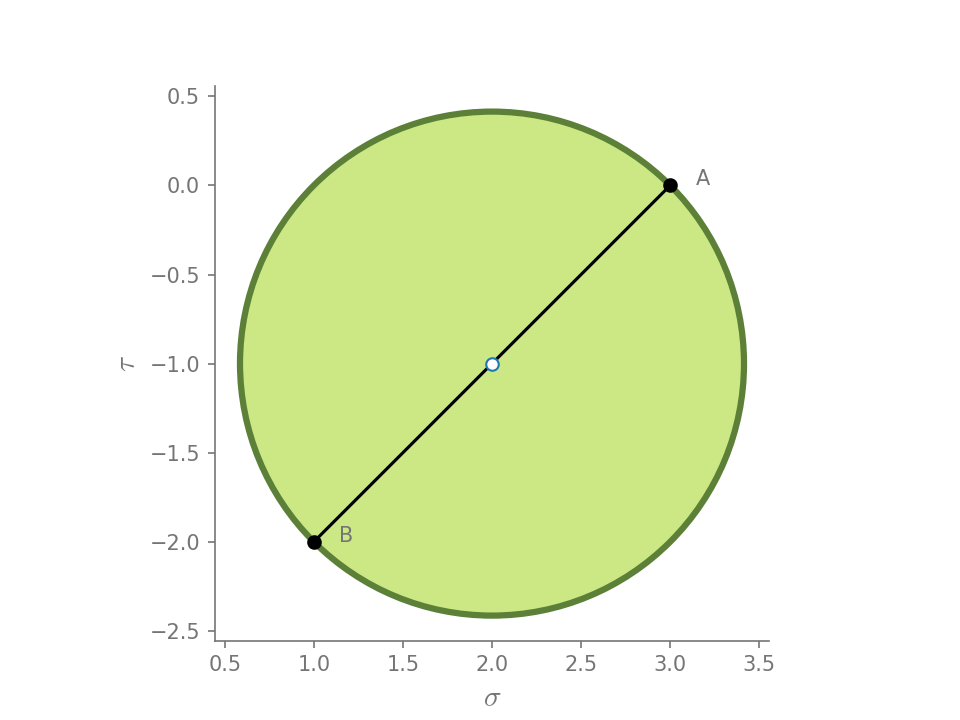

In [7]:
mohr2d(Matrix([
    [1, 2],
    [0, 3]]))

<IPython.core.display.Javascript object>


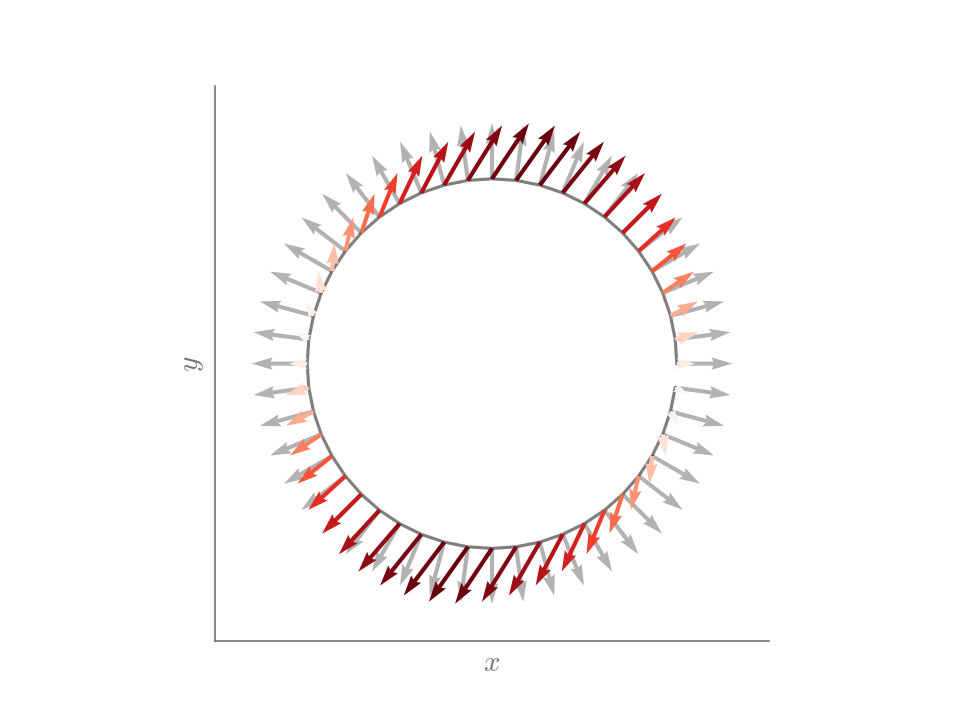

In [8]:
traction_circle(Matrix([
    [1, 2],
    [0, 3]]))

## Mohr Circle in 3D



Let us visualize the tensor

$$\begin{bmatrix}
1 &2 &4\\
2 &2 &1\\
4 &1 &3
\end{bmatrix}\, .$$

<IPython.core.display.Javascript object>


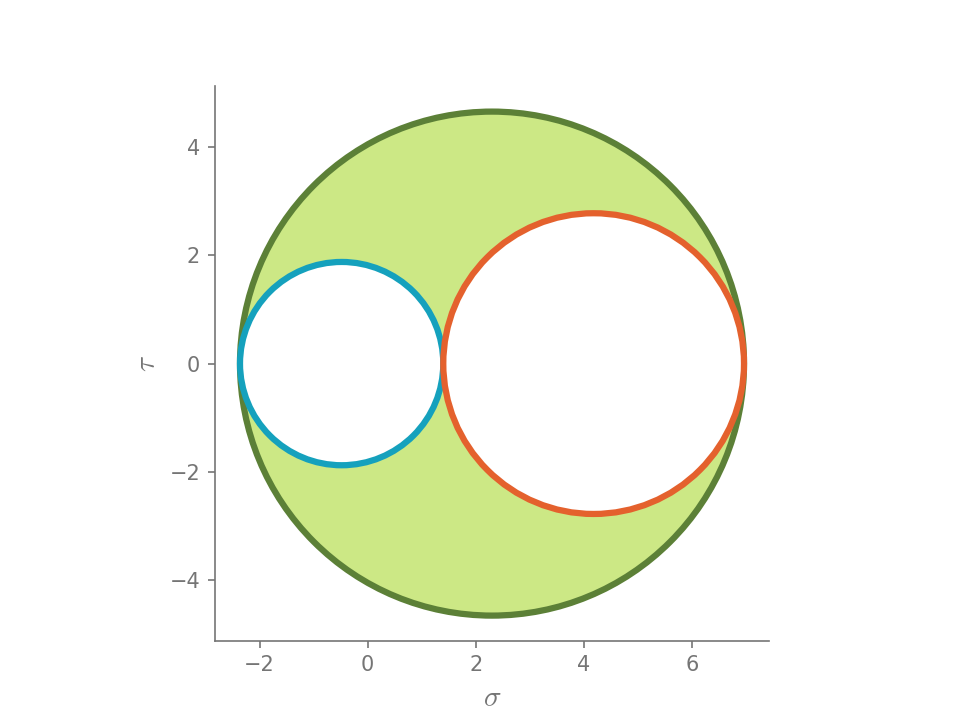

In [9]:
mohr3d(Matrix([
    [1, 2, 4],
    [2, 2, 1],
    [4, 1, 3]]))

Now, let us visualize the tensor

$$\begin{bmatrix}
1 &0 &0\\
0 &2 &0\\
0 &0 &3
\end{bmatrix}\, .$$

<IPython.core.display.Javascript object>


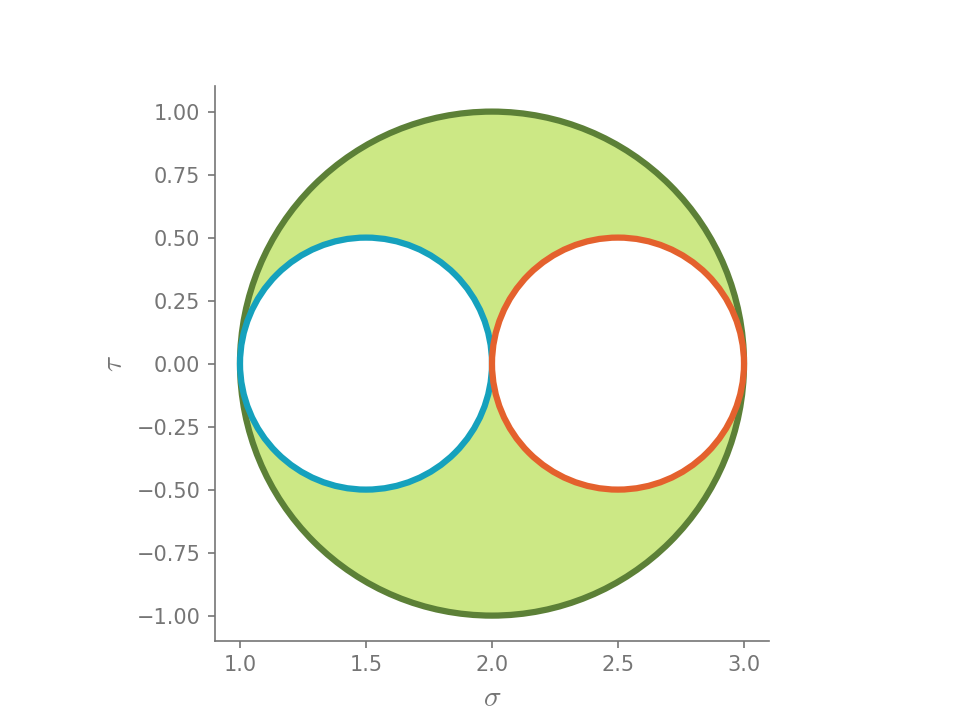

In [10]:
mohr3d(Matrix([
    [1, 0, 0],
    [0, 2, 0],
    [0, 0, 3]]))

## Elasticity tensor visualization

Let us consider β-brass that is a cubic material and
has the following material properties in Voigt notation:

$$
C_{11} = 52\text{ GPa},\quad
C_{12} = 27.5\text{ GPa},\quad
C_{44} = 173\text{ GPa}.
$$

In [11]:
C11 = 52e9
C12 = 27.5e9
C44 = 173e9
rho = 7600
C = np.zeros((6, 6))
C[0:3, 0:3] = np.array([[C11, C12, C12],
                        [C12, C11, C12],
                        [C12, C12, C11]])
C[3:6, 3:6] = np.diag([C44, C44, C44])

One way to visualize a stiffness tensor is to use the
Christofel equation

$$\det(\Gamma_{ij} - v_p^2\delta_{ij}) = 0\, ,$$

where $\Gamma_{ij}$ is the Christofel stiffness and depends
on the material properties ($c_{ijkl}$) and unit vectors ($n_i$):

$$\Gamma_{ij} = c_{iklj}n_k n_l\, .$$

This provides the eigenvalues that represent the phase
speed for three propagation modes in the material.

In [12]:
V1, V2, V3, phi_vec, theta_vec = christofel_eig(C, 100, 100) 
V1 = np.sqrt(V1/rho)
V2 = np.sqrt(V2/rho)
V3 = np.sqrt(V3/rho)

Phase speed for the first quasi-transverse mode.

<IPython.core.display.Javascript object>


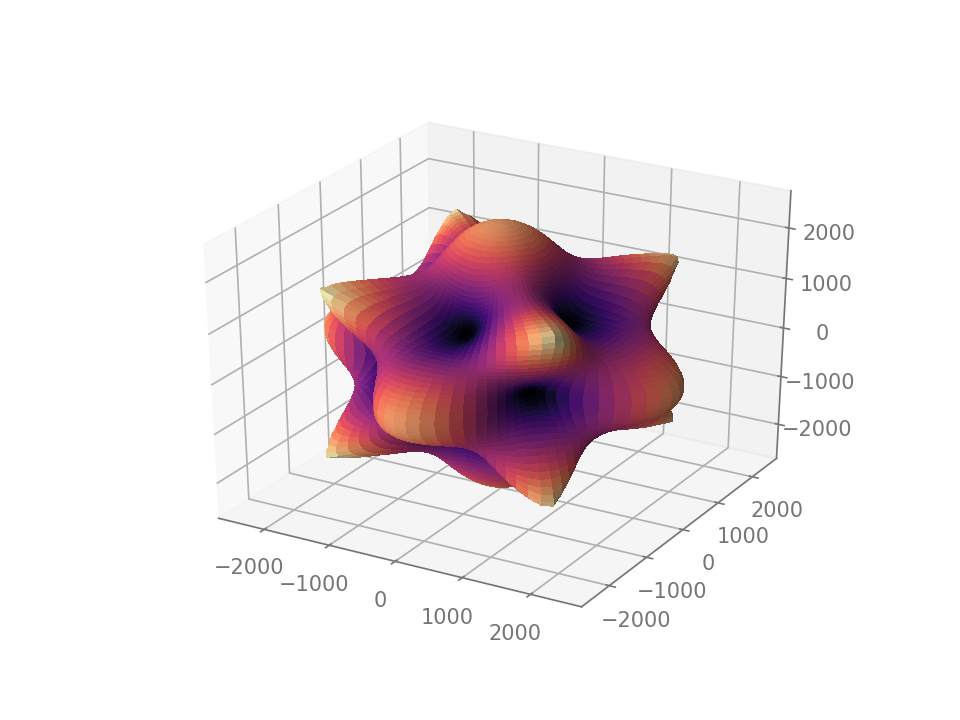

In [13]:
plot_surf(V1, phi_vec, theta_vec)

Phase speed for the second quasi-transverse mode.

<IPython.core.display.Javascript object>


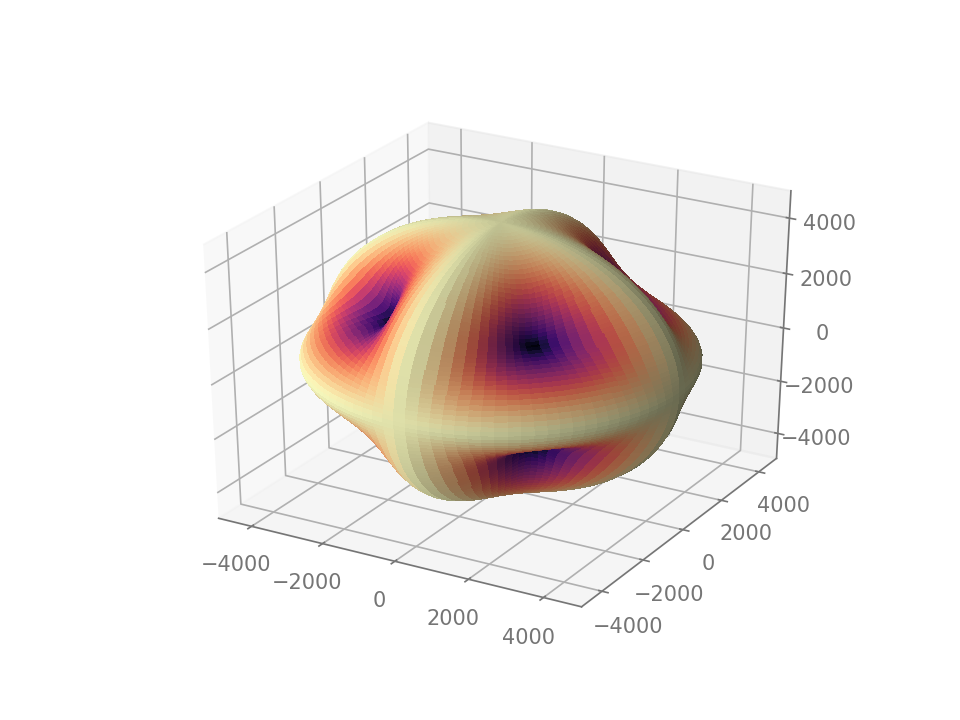

In [14]:
plot_surf(V2, phi_vec, theta_vec)

Phase speed for the quasi-longitudinal mode.

<IPython.core.display.Javascript object>


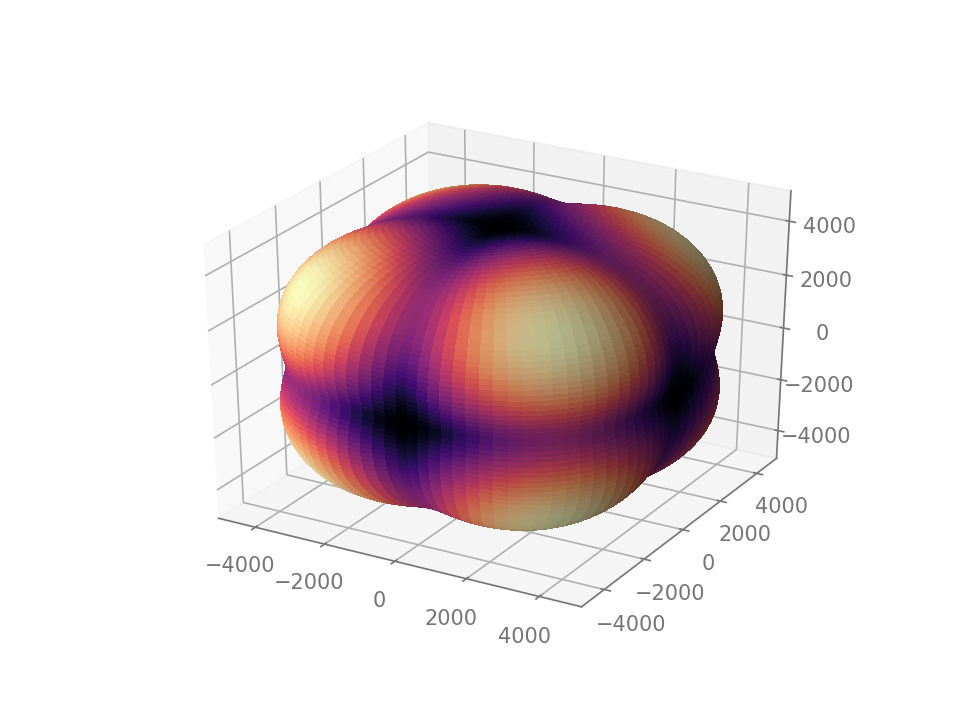

In [15]:
plot_surf(V3, phi_vec, theta_vec)